##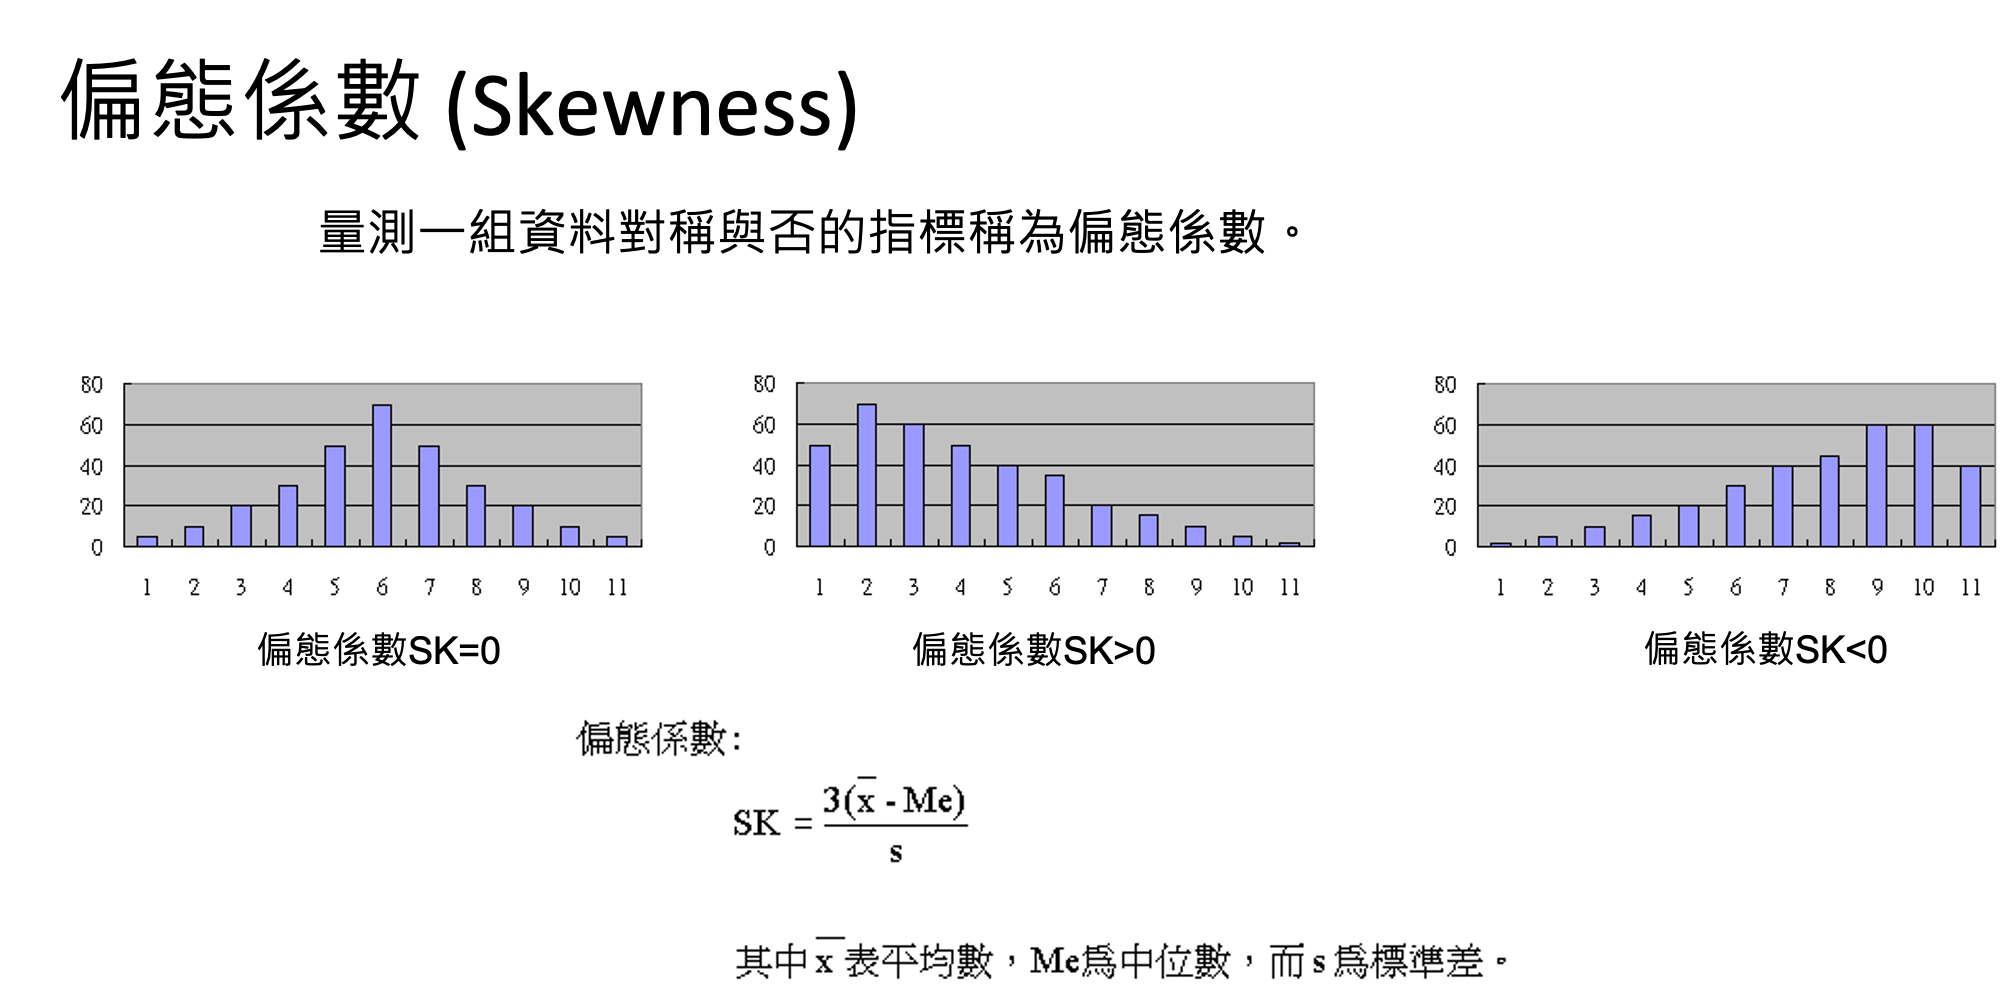掛載雲端硬碟

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##指定資料夾

In [3]:
folder="/content/drive/MyDrive/MyMLProj"

##載入統計套件

In [4]:
import statistics
from statistics import mean

##平均值: mean() 可以計算多個數字的平均值，計算結果以小數點兩位顯示。

In [5]:
arr = [1, 2, 3, 4, 5, 6, 7, 8]
a = statistics.mean(arr)    # 計算平均值
print('mean=',a)                    # 4.5

mean= 4.5


##中位數: median() 可以計算多個數字的中位數，如果數字的數量為奇數，則回傳中間的數字，如果是偶數，則回傳中間數字的平均值。

In [6]:
arr = [1, 2, 3, 4, 5, 6, 7, 8]
arr2 = [1, 2, 3, 4, 5, 6, 7]
a = statistics.median(arr)    # 計算中位數
b = statistics.median(arr2)   # 計算中位數
print('a=',a)   # 4.5
print('b=',b)   # 4

a= 4.5
b= 4


##median_low() 和 median_high() 可以計算「偶數個」數據中，較高或較低的中位數，如果是數字的數量為奇數，則回傳中間的數字 ( 等同 median() )。

In [7]:
arr = [1, 2, 3, 4, 5, 6, 7, 8]
a = statistics.median_low(arr)    # 計算較低的中位數
b = statistics.median_high(arr)   # 計算較高的中位數
print('low_a=',a)   # 4
print('high_b=',b)   # 5

low_a= 4
high_b= 5


##median_grouped():可以計算數據分組 ( 同樣數值的分成同一組 ) 的中位數。

In [8]:
arr = [1, 2, 2, 3, 4, 4, 4, 4, 4, 4, 5, 5]   # 數據中有重複的數值
a = statistics.median_grouped(arr)    # 計算分組的中位數
print('mg_a=',a)   # 3.8333333333333335

mg_a= 3.8333333333333335


##mode() 可以計算眾數 ( 數據中出現最多次的數值 )。


In [9]:
arr = [1, 2, 2, 3, 4, 4, 4, 4, 4, 4, 5, 5]
a = statistics.mode(arr)    # 計算出現最多次的數值
print('mode_a=',a)   # 4

mode_a= 4


##pstdev():計算數據的母體標準差
##pvariance():計算數據的母體變異數。

In [10]:
arr = [1, 2, 3, 4, 5, 6, 7, 8, 9]
a = statistics.pstdev(arr)
b = statistics.pvariance(arr)
print('pstdev_a=',a)   # 2.581988897471611
print('pvariance_b=',b)   # 6.666666666666667

pstdev_a= 2.581988897471611
pvariance_b= 6.666666666666667


##stdev() :計算數據的樣本標準差
##variance():計算數據的樣本變異數

In [11]:
a = statistics.stdev(arr)
b = statistics.variance(arr)
print('stdev_a=',a)   # 2.7386127875258306
print('variance_b=',b)

stdev_a= 2.7386127875258306
variance_b= 7.5


#產生隨機資料

[資料來源]https://medium.com/jimmy-wang/python-numpy-%E5%AD%B8%E7%BF%92%E7%AD%86%E8%A8%98-random-np-002-1bc4aa3f3651

##載入相關套件

In [12]:
from numpy import random    #亂數產生
import numpy as np       #數學處理
import pandas as pd       #資料處理
import matplotlib.pyplot as plt #繪圖
import seaborn as sns      #繪圖

##數值隨機生成/
隨機生成的目標可以有整數、浮點數或是從array生成。

In [13]:
random.randint(50000) #()內數值代表範圍，從0~50000產出一整數

42714

In [14]:
random.rand(10)  #()內數值代表個數，隨機生成10個float

array([0.40391726, 0.80237516, 0.91117727, 0.62654745, 0.43331784,
       0.21343428, 0.10924748, 0.06671969, 0.21348535, 0.97972023])

若需要生成多個int，則可以使用size這個參數進行調整。

In [15]:
random.randint(100, size=(2,2)) #[[45 95]  [14 96]]

array([[17, 84],
       [42, 39]])

In [16]:
random.rand(2,2)    #[[0.909492 0.041678]  [0.338248 0.542733]]

array([[0.07832271, 0.53014894],
       [0.68571161, 0.01017459]])

若要從array任意取出則可使用choice函數。

In [17]:
random.choice([1,3,5,7,9], size=(2,2)) #[[3 1]  [9 3]]

array([[5, 1],
       [5, 9]])

##離群值的處理

[參考網站]https://andy6804tw.github.io/2021/04/02/python-outliers-clean/

STEP-1.隨機產生的資料集，共有5000筆數據，特徵 x 僅有一個。

In [29]:
# 設定隨機種子
#random.seed(20)

#data=1000*(random.rand(5000))

print(data)

[217.46422739 926.83472077 333.33632375 ... 281.04758902 429.93841208
 140.17661272]


STEP-2.資料觀察

In [30]:
d = pd.DataFrame(data,columns=['x']) #特徵只有一個欄位:x
# 查看資料分布狀況
d.describe()

,x
count,5000.000000
mean,503.798435
std,287.865787
min,0.256982
25%,253.894482
50%,503.954825
75%,753.888885
max,999.997305


STEP-3.求出四分位距(IQR)=Q3-Q1與上邊界(天花板)和下邊界(地板)

In [31]:
Q1=d['x'].quantile(0.25)
Q3=d['x'].quantile(0.75)
IQR=Q3-Q1
Upper=Q3+1.5*IQR
Lower=Q1-1.5*IQR
print('Q3=',Q3,'Q1=',Q1,'IQR=',IQR,'Upper=',Upper,'Lower=',Lower)

Q3= 753.8888851489876 Q1= 253.8944824340716 IQR= 499.99440271491596 Upper= 1503.8804892213616 Lower= -496.0971216383024


STEP-4.製作箱型圖\
透過 boxplot 來查看特徵 x 在 3000 筆資料中的分布狀況。

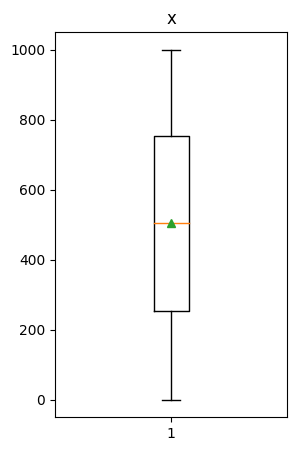

In [34]:
plt.figure(figsize=(3,5))
plt.boxplot(d['x'],showmeans=True)
plt.title('x')
plt.show()

STEP-5.分布狀態\


<ipython-input-35-8a58469cf4b3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d['x'])


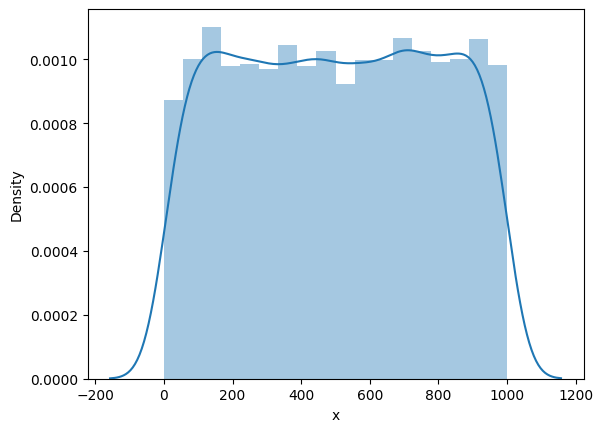

In [35]:
sns.distplot(d['x'])
plt.show()

STEP-6.偏態&峰度\

In [36]:
#skewness and kurtosis
print("偏態(Skewness): {:.2f}".format(d['x'].skew()))
print("峰度(Kurtosis): {:.2f}".format(d['x'].kurt()))

偏態(Skewness): -0.01
峰度(Kurtosis): -1.21


STEP-7.離群值處理\
這裡提供兩種常見的方法來對資料進行處理:\
第一個是將左偏的資料取平方\
第二種是透過分位數來移除離群值\

方法1: 特徵取平方\
因為資料型態左偏，因此我們可以透過取平方來將資料拉回使為更集中。

<ipython-input-37-bfb7ac7857f6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(exp_data)


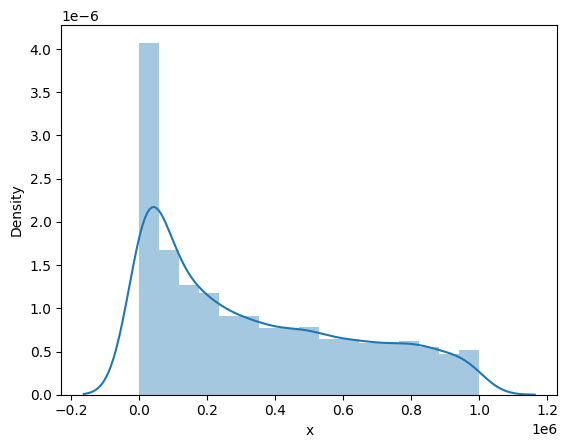

In [37]:
exp_data = np.power(d['x'], 2)
exp_data = exp_data.replace([np.inf, -np.inf, -0], 0)
sns.distplot(exp_data)
plt.show()

方法二: 移除離群值\
在Q3＋1.5IQR（四分位距）和Q1-1.5IQR處畫兩條與中位線一樣的線段，這兩條線段為異常值截斷點，稱其為內限；在Q3＋3IQR和Q1－3IQR處畫兩條線段，稱其為外限。處於內限以外位置的點表示的數據都是異常值，其中在內限與外限之間的異常值為溫和的異常值（mild outliers），在外限以外的為極端的異常值 (extreme outliers)。

In [38]:
print ("Shape Of The Before Ouliers: ",d.shape)
n=1.5
#IQR = Q3-Q1
IQR = np.percentile(d['x'],75) - np.percentile(d['x'],25)
#outlier = Q3 + n*IQR
d=d[d['x'] < np.percentile(d['x'],75)+n*IQR]
#outlier = Q1 - n*IQR
d=d[d['x'] > np.percentile(d['x'],25)-n*IQR]
print ("Shape Of The After Ouliers: ",data.shape)

Shape Of The Before Ouliers:  (5000, 1)
Shape Of The After Ouliers:  (5000,)


<ipython-input-39-8a58469cf4b3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d['x'])


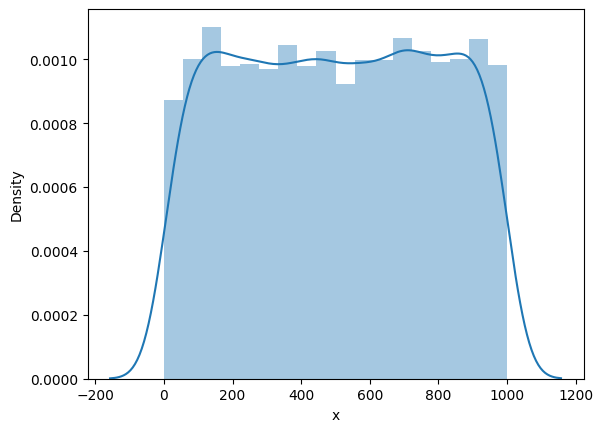

In [39]:
sns.distplot(d['x'])
plt.show()